In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
 df = pd.read_csv("E:/Practice/introduction to python/machine learning/Day 3/Iris.csv")

In [41]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
X = df[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]]
Y = df[["Species"]]

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
features = X_scaled.T
covariance_matrix = np.cov(features)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [45]:
values, vectors = np.linalg.eig(covariance_matrix)

In [46]:
vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [47]:
values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

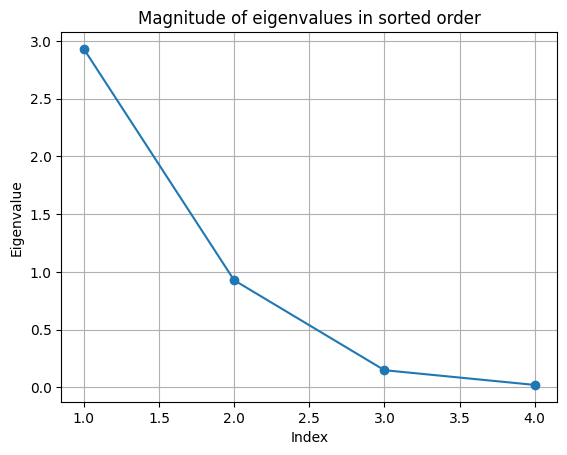

In [48]:
sorted_indices = np.argsort(values)[::1]
eigenvalues = values[sorted_indices]

plt.figure()
plt.plot(np.arange(1,len(values)+1),values,'o-')
plt.title("Magnitude of eigenvalues in sorted order")
plt.xlabel("Index")
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [49]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
result = pd.DataFrame(projected_1, columns=['PC1'])
result['PC2']=projected_2
result['species']= Y
result


,PC1,PC2,species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa
...,...,...,...
145,1.870522,-0.382822,Iris-virginica
146,1.558492,0.905314,Iris-virginica
147,1.520845,-0.266795,Iris-virginica
148,1.376391,-1.016362,Iris-virginica


<Axes: xlabel='PC1', ylabel='PC2'>

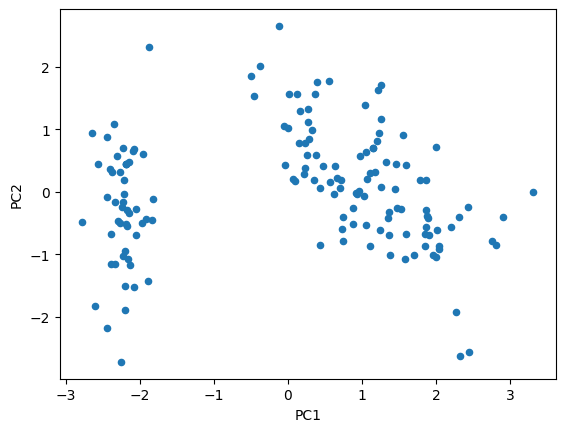

In [50]:
result.plot(kind='scatter',x='PC1', y='PC2')

In [51]:
X_pda=pd.DataFrame(projected_1, columns = ['PC1'])
X_pda['PC2']=projected_2

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X_pda, Y, test_size=0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)

accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy: .2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=Y['Species'].unique()))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.89
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.90      0.69      0.78        13
 Iris-virginica       0.75      0.92      0.83        13

       accuracy                           0.89        45
      macro avg       0.88      0.87      0.87        45
   weighted avg       0.90      0.89      0.89        45

[[19  0  0]
 [ 0  9  4]
 [ 0  1 12]]


C:\Users\shubhiii\anaconda3\envs\new_env\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
n_features = X.shape[1]
class_labels = np.unique(Y)

In [62]:
mean_vectors= []
for cls in class_labels:
    mean_vectors.append(np.mean(X[Y == cls],axis=0))
print(mean_vectors)

[SepalLengthCm   NaN
SepalWidthCm    NaN
PetalLengthCm   NaN
PetalWidthCm    NaN
dtype: float64, SepalLengthCm   NaN
SepalWidthCm    NaN
PetalLengthCm   NaN
PetalWidthCm    NaN
dtype: float64, SepalLengthCm   NaN
SepalWidthCm    NaN
PetalLengthCm   NaN
PetalWidthCm    NaN
dtype: float64]


In [ ]:
S_W = np.zeros((n_features, n_features))
for cls, mean_vec in zip(class_